In [1]:
#data in
x= [100,160,20,90,40,20,90,100,15]
y = [4,10,6,11,6,6,10,10,6]
n = len(x)

#check input
print (len(y)==n)

True


In [2]:
#intermediate steps
sumx = sum(x)
sumy = sum(y)
sumxx = sum([xi*xi for xi in x])
sumxy = sum([x[i]*y[i] for i in range(0,n)])
xbar = sumx/n
ybar = sumy/n

b1 = (n*sumxy - sumx*sumy)/(n*sumxx - sumx**2)
b0 = ybar - b1*xbar

print('sumx = {}\nsumy = {}\nsumxx = {}\nsumxy = {}\n\nb0 = {}\nb1 = {}'
     .format(sumx, sumy, sumxx, sumxy, b0, b1))

sumx = 635
sumy = 69
sumxx = 64425
sumxy = 5460

b0 = 5.539212910532276
b1 = 0.030152887882219707


In [3]:
#output line equation in semi-readable format
yh = lambda x : b0 + b1*x
print('Linear Regression Line: y = {:.3f} + {:.3f}x'.format(b0, b1))

Linear Regression Line: y = 5.539 + 0.030x


In [4]:
#noise standard deviation
Sxx = sum([(xi-xbar)**2 for xi in x])
Sxy = sum((x[i]-xbar)*(y[i]-ybar) for i in range(0,n))
SSE = sum([(y[i] - yh(x[i]))**2 for i in range(0,n)])

print ('Sxx = {:.3f}\nSxy = {:.3f}\nSSE = {:.3f}'.format(Sxx, Sxy, SSE))

MSE = SSE/(n-2)
sigma = MSE**0.5
print ('sigma^2 =', sigma)

Sxx = 19622.222
Sxy = 591.667
SSE = 34.160
sigma^2 = 2.2090573728678717


In [5]:
#regression significance
a = 0.05

import scipy.stats as sps
T0 = b1/(MSE/Sxx)**0.5
tval = sps.t.ppf(1-a/2,n-2)
print('T0 =', round(T0,3), '>', round(tval,3), '= t_{n-2}')
print('Reject/Is regression significant? = ', T0 > tval)

T0 = 1.912 > 2.365 = t_{n-2}
Reject/Is regression significant? =  False


In [6]:
#p value
P = 2*(sps.t.sf(abs(T0),n-2))
print('P value =', round(P,3))

P value = 0.097


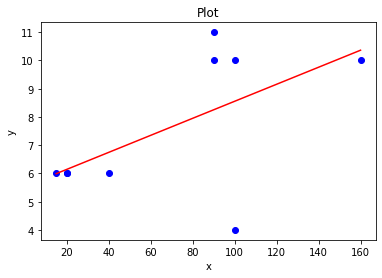

In [8]:
#plotting because that's fun
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x,y,'bo',linewidth=0)

import numpy as np
tx = np.linspace(min(x), max(x), 2)
ty = [yh(x) for x in tx]
ax.plot(tx, ty, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Plot')
plt.show()